In [4]:
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats 
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
#Reading the data
df=pd.read_csv("C:\\Users\\SINGRAI SUREN\\Downloads\\day.csv")


In [5]:
print("Skewness: %f" % df['cnt'].skew())
print("Kurtosis: %f" % df['cnt'].kurt())


Skewness: -0.047353
Kurtosis: -0.811922


In [9]:
#missing value analysis
missing_value = pd.DataFrame(df.isnull().sum())
missing_value = (missing_value/len(df))*100
missing_value.reset_index()

missing_value = missing_value.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
#Arranging Missing Values in Decreasing Order
missing_value = missing_value.sort_values('Missing_percentage', ascending = False)
missing_value
##There is no missing value in the dataframe

,Missing_percentage
instant,0.0
dteday,0.0
season,0.0
yr,0.0
mnth,0.0
holiday,0.0
weekday,0.0
workingday,0.0
weathersit,0.0
temp,0.0


{'whiskers': [<matplotlib.lines.Line2D at 0x287f1669b48>,
 'caps': [<matplotlib.lines.Line2D at 0x287f1669cc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x287f1669288>],
 'medians': [<matplotlib.lines.Line2D at 0x287f1679ec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x287f1679f88>],
 'means': []}

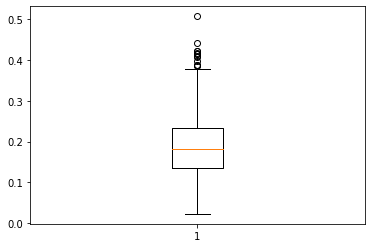

In [11]:
%matplotlib inline
plt.boxplot(df['windspeed'])

#Positive outliers found in windspeed

{'whiskers': [<matplotlib.lines.Line2D at 0x287f16eea48>,
 'caps': [<matplotlib.lines.Line2D at 0x287f16f4b88>,
 'boxes': [<matplotlib.lines.Line2D at 0x287f16e9e48>],
 'medians': [<matplotlib.lines.Line2D at 0x287f16f8c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x287f16f8d88>],
 'means': []}

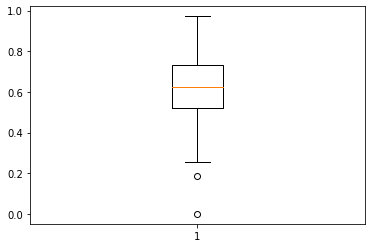

In [12]:
%matplotlib inline
plt.boxplot(df['hum'])

#Negative outlier found in hum

In [13]:
cnames = ["dteday","yr","season","mnth","workingday","weekday","weathersit","temp","atemp","hum","windspeed"]
pnames = ["temp","hum","windspeed"]

In [14]:
#Detect & Delete Outliers
for i in pnames :
    print (i)
    q75,q25 = np.percentile(df.loc[:,i],[75,25])
    iqr = q75-q25
    
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print (min)
    print (max)
    
    df = df.drop(df[df.loc[:,i] < min].index)
    df = df.drop(df[df.loc[:,i] > max].index)

temp
-0.14041600000000015
1.1329160000000003
hum
0.20468725
1.0455212500000002
windspeed
-0.012431000000000025
0.380585


In [15]:
#Converting redpective variables to required data format 
df['dteday'] = pd.to_datetime(df['dteday'],yearfirst=True)
df['season'] = df['season'].astype('category')
df['yr'] = df['yr'].astype('category')
df['mnth'] = df['mnth'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['weekday'] = df['weekday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weathersit'] = df['weathersit'].astype('category')

df['temp'] = df['temp'].astype('float')
df['atemp'] = df['atemp'].astype('float')
df['hum'] = df['hum'].astype('float')
df['windspeed'] = df['windspeed'].astype('float')
df['casual'] = df['casual'].astype('float')
df['registered'] = df['registered'].astype('float')
df['cnt'] = df['cnt'].astype('float')

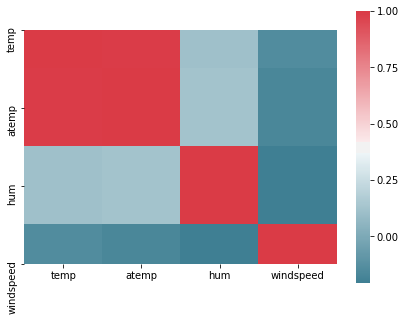

In [16]:
##Feature selection o the basis of various features like correlation, multicollinearity.
#Correlation Plot
df_corr = df.loc[:,cnames]
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [18]:
#Chi Square Test of Independence
#Saving Categorical Numbers
ctnames = ["yr","mnth","season","holiday","workingday","weekday","weathersit"]

In [19]:
from scipy.stats import chi2_contingency
for i in ctnames:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['cnt'], df[i]))
    print(dof)

yr
683
mnth
7513
season
2049
holiday
683
workingday
683
weekday
4098
weathersit
1366


In [21]:
#Removing variables atemp beacuse it is highly correlated with temp,
#Removing weekday,holiday because they dont contribute much to the independent variables
#Removing Causal and registered becuase that's what we need to predict.

df = df.drop(['atemp','holiday','workingday','casual','registered'], axis =1)

G:\songs videos\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


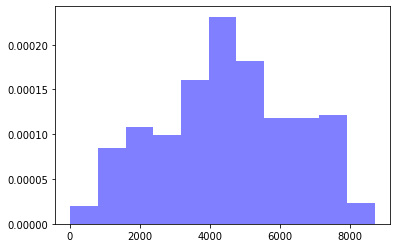

In [22]:
#Distribution of cnt
%matplotlib inline

num_bins = 11
plt.hist(df['cnt'], num_bins, normed=1, facecolor='blue', alpha=0.5)
plt.show()

mnth
1     61
2     53
3     58
4     58
5     62
6     60
7     62
8     62
9     60
10    60
11    60
12    61
dtype: int64


Text(0, 0.5, 'Total Bikes Rented')

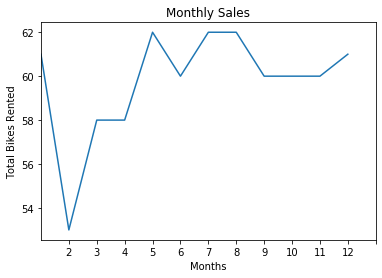

In [23]:
#Bike Rentals Monthly
sales_by_month = df.groupby('mnth').size()
print(sales_by_month)
#Plotting the Graph
plot_by_month = sales_by_month.plot(title='Monthly Sales',xticks=(1,2,3,4,5,6,7,8,9,10,11,12))
plot_by_month.set_xlabel('Months')
plot_by_month.set_ylabel('Total Bikes Rented')

Text(0, 0.5, 'Total Bikes Rented')

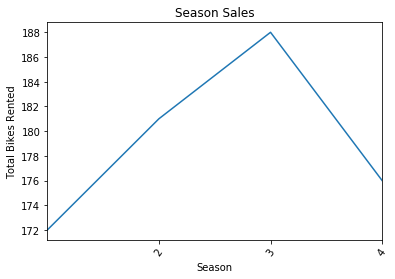

In [25]:
sales_by_weekday = df.groupby('season').size()
plot_by_day = sales_by_weekday.plot(title='Season Sales',xticks=(range(1,4)),rot=55)
plot_by_day.set_xlabel('Season')
plot_by_day.set_ylabel('Total Bikes Rented')

In [29]:
#MODEL DEVELOPMENT
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,export_graphviz


In [41]:
#Splitting data into train and test data
X = df.values[:,1:9]
Y = df.values[:,9]

X_train,y_train,X_test,y_test = train_test_split( X, Y, test_size = 0.2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#RF_model = RandomForestRegressor(n_estimators = 100).fit(X_train, y_train)
RF_model = RandomForestRegressor(n_estimators = 1000, random_state = 1337)
# Train the model on training data
RF_model.fit(X_train, X_test);

# Use the forest's predict method on the test data
predictions = RF_model.predict(y_train)
# Calculate the absolute errors
errors = abs(predictions - y_test)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

#RF_model = RandomForestRegressor(n_estimators = 100).fit(X_train, y_train)
RF_model = RandomForestRegressor(n_estimators = 1000, random_state = 1337)
# Train the model on training data
RF_model.fit(X_train, X_test);

# Use the forest's predict method on the test data
predictions = RF_model.predict(y_train)
# Calculate the absolute errors
errors = abs(predictions - y_test)


In [39]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

,instant,dteday,season,yr,mnth,weekday,weathersit,temp,hum,windspeed,cnt
0,1,2011-01-01,1,0,1,6,2,0.344167,0.805833,0.160446,985.0
1,2,2011-02-01,1,0,1,0,2,0.363478,0.696087,0.248539,801.0
2,3,2011-03-01,1,0,1,1,1,0.196364,0.437273,0.248309,1349.0
3,4,2011-04-01,1,0,1,2,1,0.200000,0.590435,0.160296,1562.0
4,5,2011-05-01,1,0,1,3,1,0.226957,0.436957,0.186900,1600.0
